In [108]:
import pandas as pd

In [109]:
import numpy as np

In [110]:
df = pd.read_csv("../data/Dataset-Cleaned.csv",dtype = {'id_str':object,'in_reply_to_user_id_str':object,'from_user_id_str':object,'in_reply_to_status_id_str':object})

In [111]:
num_tweets = len(df)
print(num_tweets)

77267


In [112]:
num_replies = len(df[df.in_reply_to_status_id_str.notnull()])
print("There are %d replies in the dataset." % num_replies)

There are 1185 replies in the dataset.


In [113]:
num_retweets = len(df[df.text.str.contains('RT @')])
print("There are %d retweets in the dataset." % num_retweets)

There are 60278 retweets in the dataset.


In [114]:
num_onlytweets = num_tweets - (num_replies + num_retweets)
print("There are %d tweets in the dataset that aren't replies or retweets"% num_onlytweets)

There are 15804 tweets in the dataset that aren't replies or retweets


In [115]:
num_users = len(df['from_user'].unique())
print("There are %d users in the dataset." % num_users)

There are 50195 users in the dataset.


In [116]:
avg_tweets = num_tweets / num_users
print("Each user posted an average of %f tweets" % avg_tweets)

Each user posted an average of 1.539337 tweets


In [117]:
avg_retweets = num_retweets / num_users
print("Each user retweeted an average of %f tweets" % avg_retweets)

Each user retweeted an average of 1.200877 tweets


In [118]:
avg_replies = num_replies / num_users
print("Each user replied to a tweet an average of %f times" % avg_replies)

Each user replied to a tweet an average of 0.023608 times


In [119]:
import matplotlib.pyplot as plt

In [120]:
labels = 'Retweets', 'Replies', 'Tweets'

In [121]:
sizes = [num_retweets, num_replies, num_onlytweets]

In [122]:
explode = (0,0,0)

In [123]:
fig1, ax1 = plt.subplots()

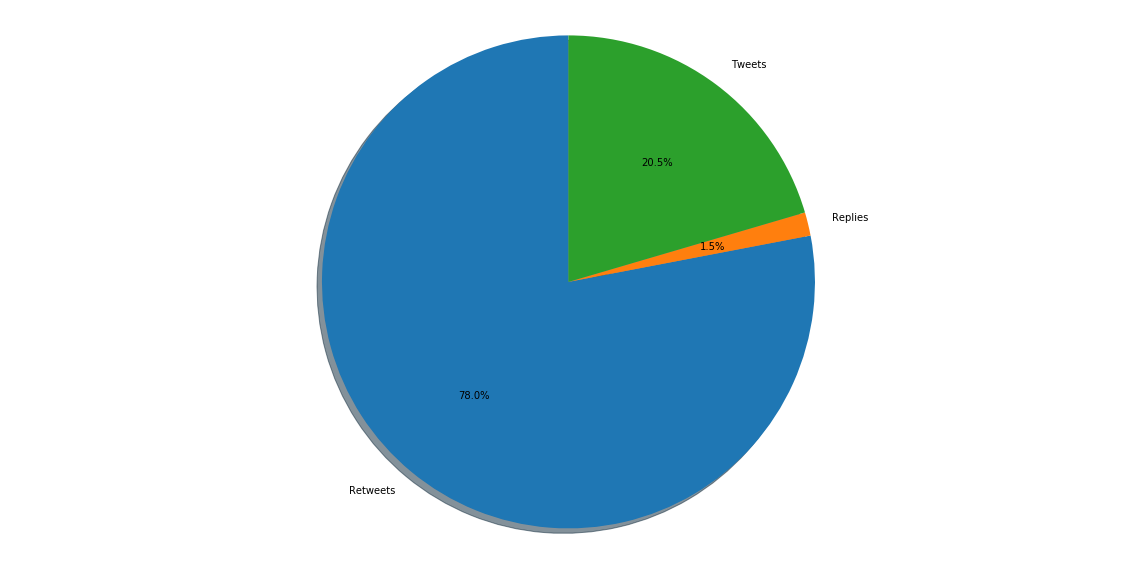

In [124]:
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [125]:
entities_list = df['entities_str']

In [126]:
entities_list

0        {"hashtags":[{"text":"GUERRIERO","indices":[44...
1        {"hashtags":[{"text":"CometLanding","indices":...
2        {"hashtags":[{"text":"CometLanding","indices":...
3        {"hashtags":[{"text":"cometlanding","indices":...
4        {"hashtags":[{"text":"CometLanding","indices":...
5        {"hashtags":[{"text":"CometLanding","indices":...
6        {"hashtags":[{"text":"CometLanding","indices":...
7        {"hashtags":[{"text":"CometLanding","indices":...
8        {"hashtags":[{"text":"CometLanding","indices":...
9        {"hashtags":[{"text":"CometLanding","indices":...
10       {"hashtags":[{"text":"CometLanding","indices":...
11       {"hashtags":[{"text":"CometLanding","indices":...
12       {"hashtags":[{"text":"CometLanding","indices":...
13       {"hashtags":[{"text":"cometlanding","indices":...
14       {"hashtags":[{"text":"SEP","indices":[30,34]},...
15       {"hashtags":[{"text":"cometlanding","indices":...
16       {"hashtags":[{"text":"probe","indices":[33,39].

In [127]:
import json

In [128]:
NewObject = json.loads(df.iloc[0].entities_str)

In [129]:
NewObject['hashtags']

[{'indices': [44, 54], 'text': 'GUERRIERO'},
 {'indices': [57, 69], 'text': 'portaaporta'},
 {'indices': [72, 85], 'text': 'CometLanding'},
 {'indices': [88, 100], 'text': 'TorSapienza'},
 {'indices': [103, 111], 'text': 'Rosetta'}]

In [130]:
EntityArray = []
for x in range(0,len(df)):
    if isinstance(df.iloc[x].entities_str, str):
        EntityArray.append(json.loads(df.iloc[x].entities_str))

In [131]:
EntityArray[0]['hashtags'][0]['text']

'GUERRIERO'

In [132]:
HashTags = {}

In [133]:
counter = 0
for i in range(0,len(EntityArray)):
    counter = counter +1
    for j in range(0,len(EntityArray[i]['hashtags'])):
        currentHashtag = str(EntityArray[i]['hashtags'][j]['text'])
        if currentHashtag in HashTags:
            HashTags[currentHashtag] = HashTags.get(currentHashtag) + 1
        else:
            HashTags[currentHashtag] = 1
counter

77266

In [134]:
HashTags

{'GUERRIERO': 152,
 'portaaporta': 85,
 'CometLanding': 62752,
 'TorSapienza': 74,
 'Rosetta': 5912,
 'cometlanding': 13211,
 'jp86': 1,
 'SEP': 623,
 'probe': 4,
 'comet': 355,
 'Cometlanding': 1036,
 'Philae': 3097,
 'momentistorici': 6,
 'yay': 4,
 'microaggressions': 1,
 '67P': 7922,
 'makinghistory': 3,
 'confirmation': 48,
 'esa': 680,
 'BNEGlobalCafe': 7,
 'Ø§Ø²Ø¹Ù„Ùƒ_ÙˆØ§Ø±Ø¶ÙŠÙƒ': 11,
 '7HoursOfTerror': 8,
 'ESOC': 63,
 'philae2014': 9,
 'rosetta': 702,
 'selfie': 89,
 'philae': 600,
 'Komet': 28,
 'Telespazio': 2,
 'DLR': 27,
 '7HoursofTerror': 3,
 'indiedev': 8,
 'CometTrek': 7,
 'cometLanding': 84,
 'semanasciencia': 2,
 'RejectedMuppets': 218,
 'Supernatural200thEpisode': 94,
 'MixersAreReadyForAlbum3': 3,
 'AnarchyAfterword': 2,
 'RosettaMission': 54,
 'rosettamission': 431,
 '7hoursofterror': 2,
 'Philae2014': 259,
 'space': 452,
 'scicomm': 8,
 'havesaveland': 1,
 'fragdieesa': 5,
 'HomeToMama': 208,
 'HariAyah': 22,
 'FleetwoodMac': 1,
 'SucceededSoSuccessfully': 1,
 '

In [135]:
tagList = sorted(HashTags.items(), key=lambda x:x[1])

In [136]:
tagList[::-1]

[('CometLanding', 62752),
 ('cometlanding', 13211),
 ('67P', 7922),
 ('Rosetta', 5912),
 ('Philae', 3097),
 ('Cometlanding', 1036),
 ('WishKoSaPasko', 988),
 ('HappyBirthdaySandaraPark', 965),
 ('rosetta', 702),
 ('esa', 680),
 ('SEP', 623),
 ('philae', 600),
 ('PoseToiPhilae', 569),
 ('space', 452),
 ('ESA', 445),
 ('rosettamission', 431),
 ('comet', 355),
 ('Philae2014', 259),
 ('COMETLANDING', 252),
 ('ISS', 231),
 ('AOS', 224),
 ('RejectedMuppets', 218),
 ('HomeToMama', 208),
 ('science', 194),
 ('ESA_Rosetta', 188),
 ('xkcd', 162),
 ('BreakTheInternet', 158),
 ('GUERRIERO', 152),
 ('TimoGH15', 148),
 ('DoctorWho', 146),
 ('Agilkia', 144),
 ('spaceveg', 138),
 ('Interstellar', 126),
 ('CometWatch', 122),
 ('autoinculpacions9N', 120),
 ('trndnl', 118),
 ('jets', 98),
 ('5SOSLONGWAYHOME', 94),
 ('Supernatural200thEpisode', 94),
 ('selfie', 89),
 ('Rosseta', 85),
 ('portaaporta', 85),
 ('cometLanding', 84),
 ('Comet67P', 83),
 ('WeCanLandOnACometButWeCant', 82),
 ('touchdown', 82),
 (

In [137]:
print("There are %d unique hashtags in the dataset." % len(tagList))

There are 3120 unique hashtags in the dataset.


In [138]:
Nov12Tweets = df['time']

In [139]:
from datetime import datetime

In [140]:
Nov12Tweets

0        12/11/2014 09:09
1        12/11/2014 09:09
2        12/11/2014 09:09
3        12/11/2014 09:09
4        12/11/2014 09:09
5        12/11/2014 09:09
6        12/11/2014 09:09
7        12/11/2014 09:09
8        12/11/2014 09:09
9        12/11/2014 09:09
10       12/11/2014 09:09
11       12/11/2014 09:09
12       12/11/2014 09:09
13       12/11/2014 09:09
14       12/11/2014 09:09
15       12/11/2014 09:09
16       12/11/2014 09:09
17       12/11/2014 09:09
18       12/11/2014 09:09
19       12/11/2014 09:09
20       12/11/2014 09:09
21       12/11/2014 09:09
22       12/11/2014 09:09
23       12/11/2014 09:09
24       12/11/2014 09:09
25       12/11/2014 09:09
26       12/11/2014 09:09
27       12/11/2014 09:09
28       12/11/2014 09:09
29       12/11/2014 09:09
               ...       
77237    05/12/2014 15:50
77238    05/12/2014 16:09
77239    05/12/2014 16:12
77240    05/12/2014 16:14
77241    05/12/2014 16:19
77242    05/12/2014 16:21
77243    05/12/2014 16:21
77244    05/

In [141]:
timeArray = []
for x in range(0,len(Nov12Tweets)):
    if isinstance(Nov12Tweets[x], str):
        timeArray.append(datetime.strptime(Nov12Tweets[x],'%d/%m/%Y %H:%M').replace(minute=0))

In [142]:
timeArray

[datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),


In [143]:
from collections import Counter

In [144]:
timeDictionary = Counter(timeArray)
timeDictionary

Counter({datetime.datetime(2014, 11, 12, 9, 0): 9816,
         datetime.datetime(2014, 11, 12, 10, 0): 5239,
         datetime.datetime(2014, 11, 12, 11, 0): 5827,
         datetime.datetime(2014, 11, 12, 12, 0): 6361,
         datetime.datetime(2014, 11, 12, 13, 0): 5159,
         datetime.datetime(2014, 11, 12, 14, 0): 2103,
         datetime.datetime(2014, 11, 12, 15, 0): 5712,
         datetime.datetime(2014, 11, 12, 16, 0): 5895,
         datetime.datetime(2014, 11, 12, 17, 0): 5904,
         datetime.datetime(2014, 11, 12, 18, 0): 5899,
         datetime.datetime(2014, 11, 12, 19, 0): 3529,
         datetime.datetime(2014, 11, 12, 20, 0): 3776,
         datetime.datetime(2014, 11, 12, 21, 0): 2116,
         datetime.datetime(2014, 11, 12, 22, 0): 4507,
         datetime.datetime(2014, 11, 12, 23, 0): 1369,
         datetime.datetime(2014, 11, 26, 14, 0): 70,
         datetime.datetime(2014, 11, 26, 15, 0): 61,
         datetime.datetime(2014, 11, 26, 16, 0): 80,
         datetime

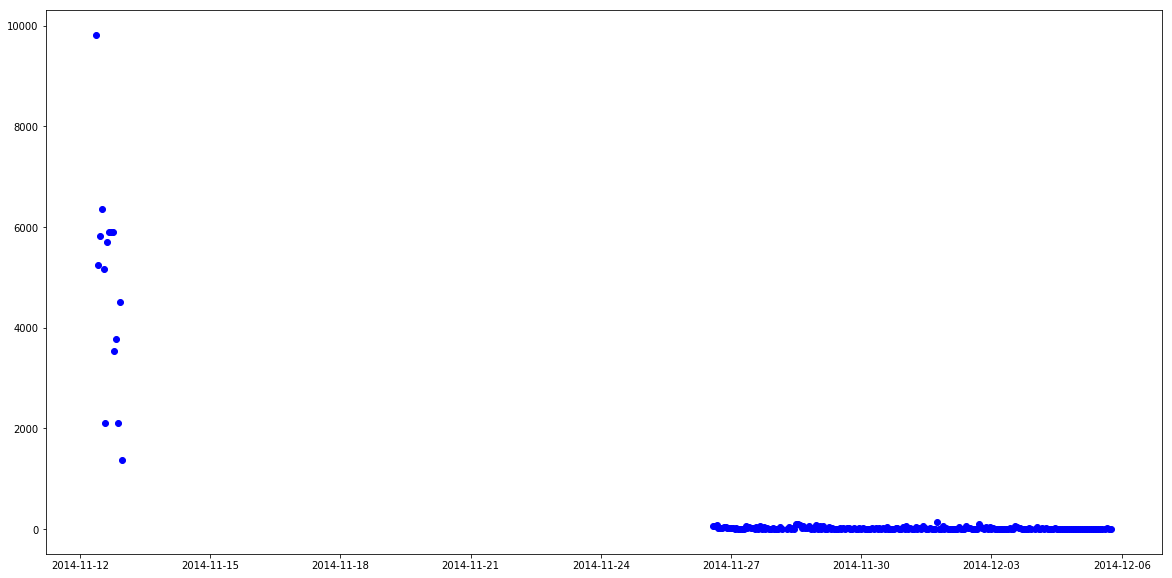

In [145]:
dates = list(timeDictionary.keys())
count = list(timeDictionary.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.plot_date(dates,count, 'bo')
#plt.plot().scatter(dates,count, 'bo')
plt.show()

Following is a graph of the frequency of tweets across the first day.

In [146]:
firstDayDict = {}
for x in timeDictionary:
    if x.month == 11 and x.day == 12:
        firstDayDict[x] = timeDictionary[x]
    else:
        break
firstDayDict

{datetime.datetime(2014, 11, 12, 9, 0): 9816,
 datetime.datetime(2014, 11, 12, 10, 0): 5239,
 datetime.datetime(2014, 11, 12, 11, 0): 5827,
 datetime.datetime(2014, 11, 12, 12, 0): 6361,
 datetime.datetime(2014, 11, 12, 13, 0): 5159,
 datetime.datetime(2014, 11, 12, 14, 0): 2103,
 datetime.datetime(2014, 11, 12, 15, 0): 5712,
 datetime.datetime(2014, 11, 12, 16, 0): 5895,
 datetime.datetime(2014, 11, 12, 17, 0): 5904,
 datetime.datetime(2014, 11, 12, 18, 0): 5899,
 datetime.datetime(2014, 11, 12, 19, 0): 3529,
 datetime.datetime(2014, 11, 12, 20, 0): 3776,
 datetime.datetime(2014, 11, 12, 21, 0): 2116,
 datetime.datetime(2014, 11, 12, 22, 0): 4507,
 datetime.datetime(2014, 11, 12, 23, 0): 1369}

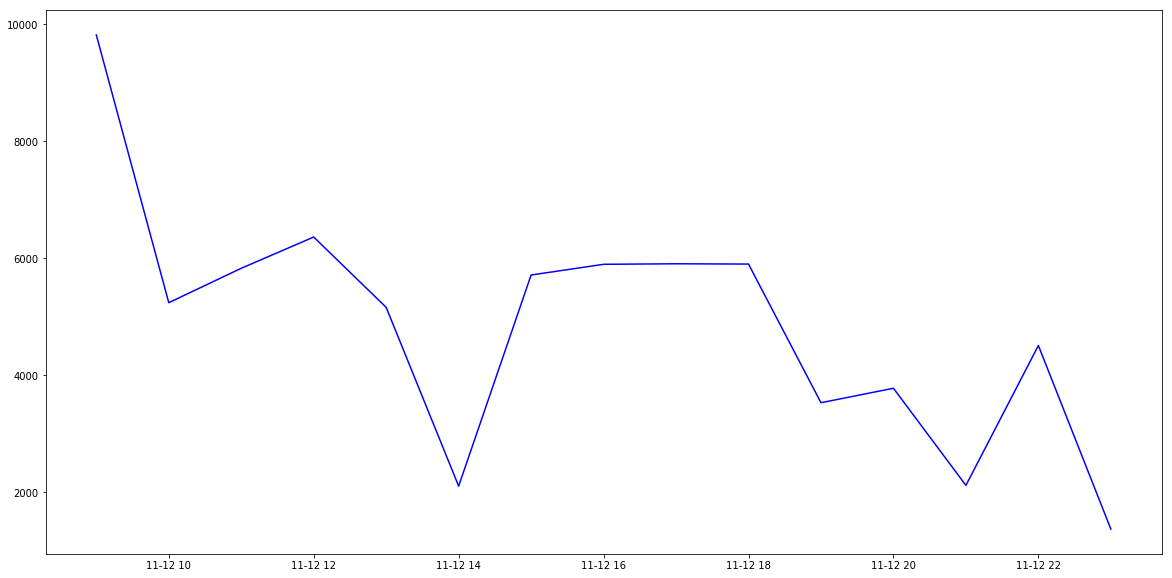

In [147]:
dates = list(firstDayDict.keys())
count = list(firstDayDict.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.plot_date(dates,count, 'b-')
#plt.plot().scatter(dates,count, 'bo')
plt.show()

In [148]:
from wordcloud import WordCloud

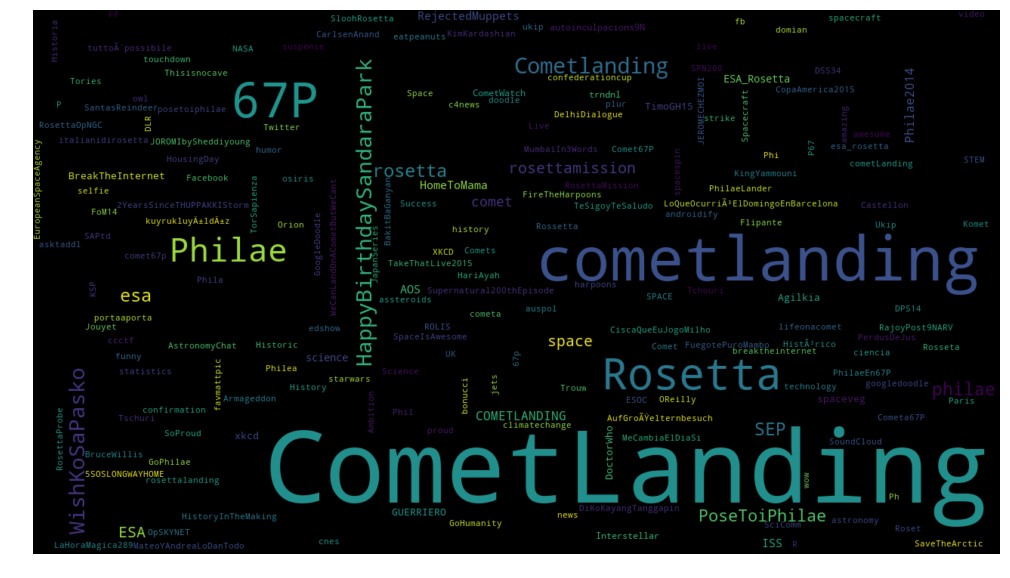

In [149]:
wordcloud = WordCloud(width=1280,height=720)
wordcloud.generate_from_frequencies(HashTags)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Write something here about how we removed the comet landing hashtags so they didn't take up all the room

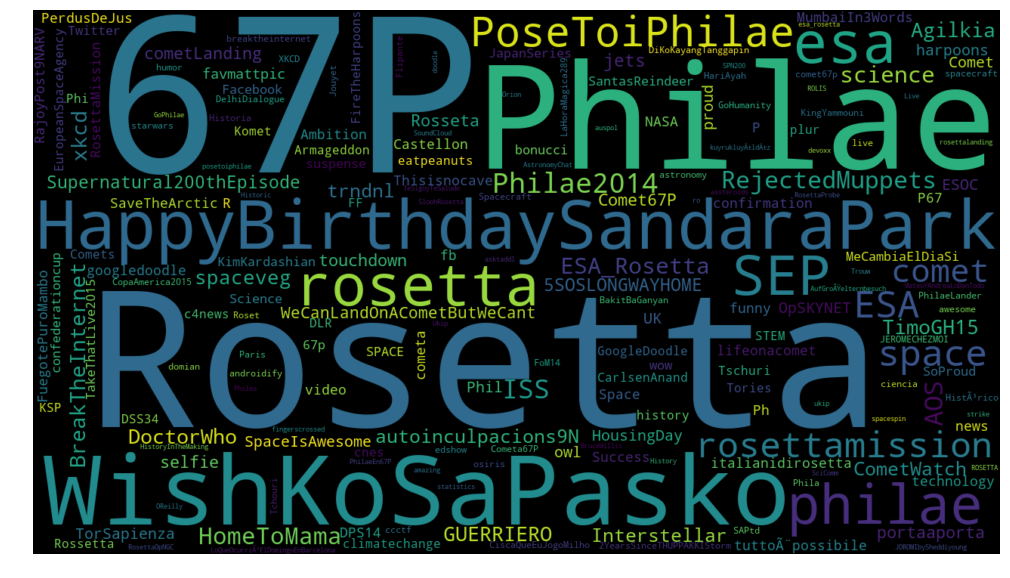

In [158]:
hashTagsCopy = HashTags.copy()
hashTagsCopy.pop("CometLanding",None)
hashTagsCopy.pop("cometlanding",None)
hashTagsCopy.pop("Cometlanding",None)
hashTagsCopy.pop("COMETLANDING",None)

wordcloud = WordCloud(width=1280,height=720)
wordcloud.generate_from_frequencies(hashTagsCopy)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Extension: Analyse applications used to send tweets

In [151]:
import re
appNames = []
source = df['source']
for s in source:
    if isinstance(s, str):
        appNames.append(re.sub("<[^<]+?>","",s).replace("/  +/g"," "))
appNames

['Twitter for Android',
 'Twitter for iPhone',
 'Twitter Web Client',
 'Twitter for Android Tablets',
 'TweetCaster for Android',
 'Twitter for Mac',
 'Twitter for Android Tablets',
 'Twitter Web Client',
 'Twitter for Android',
 'twitterfeed',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter Web Client',
 'Twitter for iPad',
 'twitterfeed',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter Web Client',
 'Twitter Web Client',
 'Livestream Android app',
 'Twitter Web Client',
 'Twitter Web Client',
 'TweetDeck',
 'Janetter',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter Web Client',
 'Dabr.eu - latest @Dabr build',
 'Twitter Web Client',
 'Twitter for iPhone',
 'Twitter Web Client',
 'twitterfeed',
 'Twitter Web Client',
 'TweetDeck',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter for Android',
 'twitterfeed',
 'Twitter for Android',
 'Tweet

In [152]:
appcounter = sorted(Counter(appNames).items(),key=lambda x:x[1])
appcounter = appcounter[::-1]

In [153]:
top_10_apps = []
for x in range(0,10):
    top_10_apps.append(appcounter[x])
top_10_apps

[('Twitter Web Client', 27925),
 ('Twitter for iPhone', 13743),
 ('Twitter for Android', 12770),
 ('TweetDeck', 4075),
 ('Twitter for iPad', 3282),
 ('dlvr.it', 1671),
 ('Twitter for Websites', 1462),
 ('Tweetbot for iÎŸS', 1055),
 ('Twitter for Windows Phone', 932),
 ('Tweet Old Post', 925)]

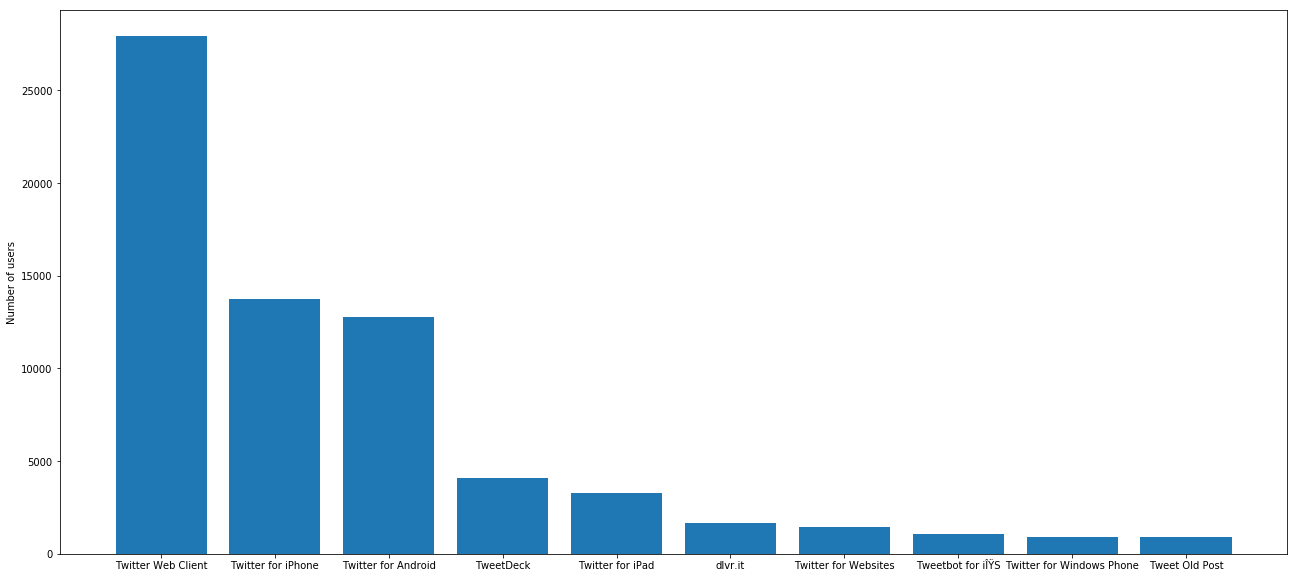

In [154]:
apps = []
numbers = []
for x in top_10_apps:
    apps.append(x[0])
    numbers.append(x[1])

plt.rcParams["figure.figsize"] = (22,10)
x_pos = np.arange(len(apps))
plt.bar(x_pos,numbers,align="center")
plt.xticks(x_pos,apps)
plt.ylabel("Number of users")
plt.show()

In [155]:
users_replied_to = len(df['in_reply_to_user_id_str'].unique()) - 1
users_replied_to

799

In [156]:
users_replied_percent = (users_replied_to / num_users) * 100
print("%f%% of the users were replied to in the dataset." % users_replied_percent)

1.591792% of the users were replied to in the dataset.


In [157]:
users_avg_retweets = (num_retweets / num_users)
print("The average user was retweeted %f times" % users_avg_retweets)

The average user was retweeted 1.200877 times
